### **Functional Brain Mapping for Alzheimer's Analysis**
Name: Aikaterini Moysiadou

Date: December 1, 2024

This notebook visualizes fMRI data associated with Alzheimer's Disease, highlighing regions of the brain with significant activity. It includes: 
1. An overlay visualization of functional data on an anatomical brain scan.
2. A histogram showing the distribution of positive activation values.

Neurosynth Data link: https://neurosynth.org/analyses/terms/alzheimer/

#### **Step 1: Importing Required Libraries**
In this step, we import the necessary Python libraries:
1. **nilearn**: For visualizing brain imaging data.
2. **nibabel**: For reading '.nii.gz' files (MRI data).
3. **matplotlib & numpy**: For creating and customizing visualizations.

In [3]:
# Import necessary libraries for handing and visualizing fMRI data
import nilearn
import nibabel
import nibabel as nib 
import matplotlib.pyplot as plt
import numpy as np

print("Packages imported successfully!")

Packages imported successfully!


#### **Step 2: Loading the Data**
In this step, we load the anatomical and functional MRI data:
- **Anatomical File**: A structure scan of the brain.
- **Functional File**: Statistical data showing regions linked to Alzheimer's Disease.

In [ ]:
# Paths to the anatomical and funtional files
anatomical_file = r"C:\Users\moisi\OneDrive\Υπολογιστής\fMRI\anatomical.nii.gz"
funtional_file = r"C:\Users\moisi\OneDrive\Υπολογιστής\fMRI\alzheimer_uniformity-test_z_FDR_0.01.nii.gz"
	
# Print file paths (for confirmation :3)
print("anatomical file path:", anatomical_file)
print("Functional File Path:", funtional_file)

# Load the anatomical and funtional images using nibabel
anatomical_img = nib.load(anatomical_file) # The anatomical image
functional_img = nib.load(funtional_file) # The functional image

anatomical file path: C:\Users\moisi\OneDrive\Υπολογιστής\fMRI\anatomical.nii.gz
Functional File Path: C:\Users\moisi\OneDrive\Υπολογιστής\fMRI\alzheimer_uniformity-test_z_FDR_0.01.nii.gz


#### **Step 3: Visualizing the Brain Map**
In this step, we use 'nilearn.plot_stat_map' to overlay the functional data onto a standard brain template. This allows us to see where significant activity is occuring in the brain. 

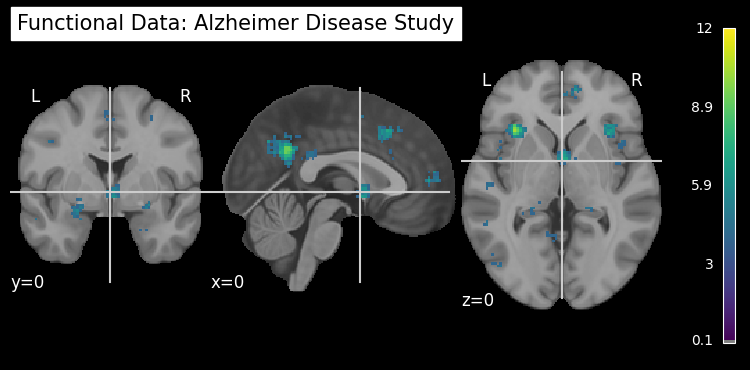

In [ ]:
from nilearn.datasets import load_mni152_template
from nilearn import plotting

# Load MNI152 template (common brain template for overlay)
mni152_template = load_mni152_template()

# Create a brain map overlay
plotting.plot_stat_map(
    functional_img, # Functional data
    bg_img=mni152_template, # Anatomical background
    cut_coords=(0, 0, 0), # Coordinates (X, Y, Z) for the cuts
    display_mode='ortho', # Display slices in orthogonal directions
    title="Functional Data: Alzheimer Disease Study", # Title of the plot
    cmap="viridis", # Color map for the overlay
    colorbar=True, # Show colorbar
    threshold=0.1, # Exclude values below 0.1
    annotate=True, # Add axis labels
    draw_cross=True, # Include crosshairs to indicate slice locations
    black_bg=True, # Use a black background for better contrast
)

# Display the plot
plotting.show()

#### **Step 4: Creating a Histogram of Alzheimer Activation Values** 
This histogram provides a visualization of the distribution of activation values associated with Alzheimer's disease in the functional data. By focusing only on positive values (those greater than 0), we can analyze the regions with significant brain activity.

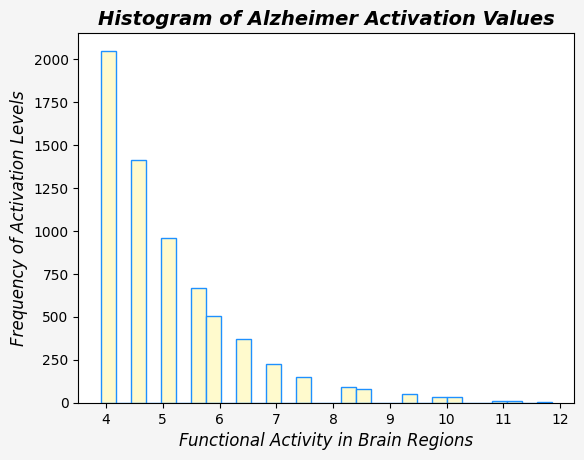

In [10]:
# Load functional data using nibabel
functional_data = nib.load(funtional_file)

# Extract the data as a NumPy array
functional_array = functional_data.get_fdata()

# Select positive values
positive_values = functional_array[functional_array > 0]

# Plot a histogram of positive activation values
plt.hist(positive_values, bins=30, color='#FFFACD', edgecolor='dodgerblue')

# Change the figure background color to a soft light gray
plt.gcf().set_facecolor('whitesmoke')

# Add title and labels
plt.title('Histogram of Alzheimer Activation Values', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Functional Activity in Brain Regions', fontsize=12, style='italic')
plt.ylabel('Frequency of Activation Levels', fontsize=12, style='italic')

# Show the plot
plt.show()